# PROJECT INTRODUCTION

### If you are planning on going out to see a movie, how well can you trust online reviews and ratings? Especially if the same company showing the rating also makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

## Goal

### The goal of the project is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_fan = pd.read_csv("fandango_scrape.csv")

In [3]:
df_fan.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
len(df_fan)

504

In [5]:
df_fan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
df_fan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


In [7]:
df_fan.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

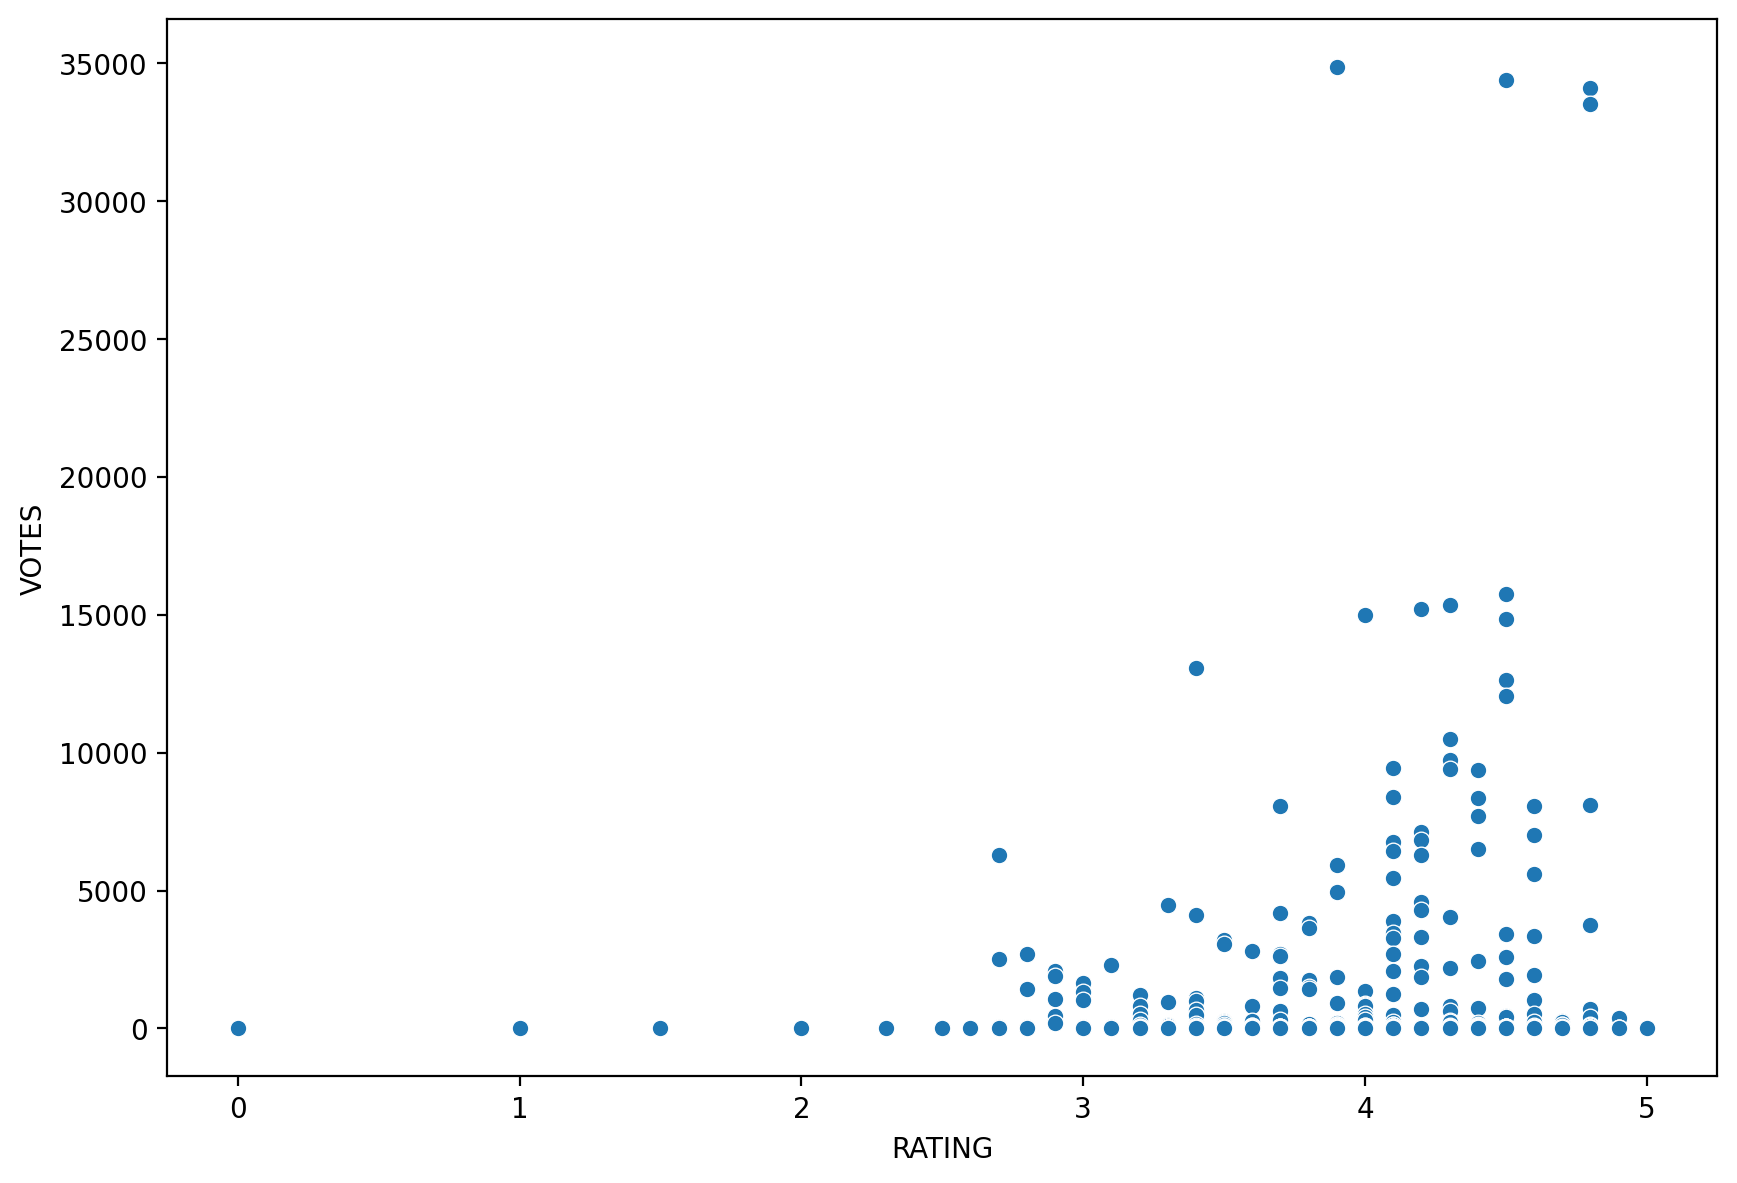

In [8]:
plt.figure(figsize=(10,7), dpi=(200))
sns.scatterplot(data=df_fan, x='RATING', y='VOTES')

##### Create a new column that is able to strip the year from the title strings and set this new column as YEAR

In [9]:
df_fan.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [10]:
df_fan['YEAR'] = df_fan['FILM'].apply(lambda title:title.split('(')[-1])
df_fan['YEAR']

0      2015)
1      2015)
2      2015)
3      2015)
4      2015)
       ...  
499    2015)
500    2015)
501    2015)
502    1964)
503    2012)
Name: YEAR, Length: 504, dtype: object

##### Number of movies per year

In [11]:
df_fan['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

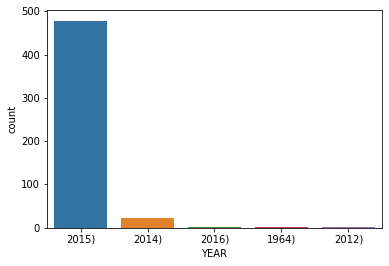

In [12]:
sns.countplot(data=df_fan, x='YEAR')

##### Movies with highest number of votes

In [13]:
df_fan_stars_test = df_fan[df_fan['STARS'].between(3,4)]
df_fan_stars_test

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
7,Minions (2015),4.0,4.0,14998,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)
20,Tomorrowland (2015),4.0,3.7,8077,2015)
29,Fantastic Four (2015),3.0,2.7,6288,2015)
...,...,...,...,...,...
416,Every Last Child (2015),4.0,4.0,1,2015)
417,Journey to Space (2015),4.0,4.0,1,2015)
418,Kidnapping Mr. Heineken (2015),4.0,4.0,1,2015)
419,Reality (2015),4.0,4.0,1,2015)


In [14]:
df_fan_highest_votes = df_fan.sort_values('VOTES')
df_fan_highest_votes.tail(10)

,FILM,STARS,RATING,VOTES,YEAR
9,Into the Woods (2014),3.5,3.4,13055,2014)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
7,Minions (2015),4.0,4.0,14998,2015)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
4,Inside Out (2015),4.5,4.5,15749,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)


In [15]:
df_fan.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


In [16]:
#Movies with zero votes

df_zero_rating = df_fan[df_fan['VOTES'] == 0]
len(df_zero_rating)

69

In [17]:
#Data frame of movies with a rating above zero
df_ratings = df_fan[df_fan['VOTES'] > 0]
len(df_ratings)

435

In [18]:
df_ratings.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)


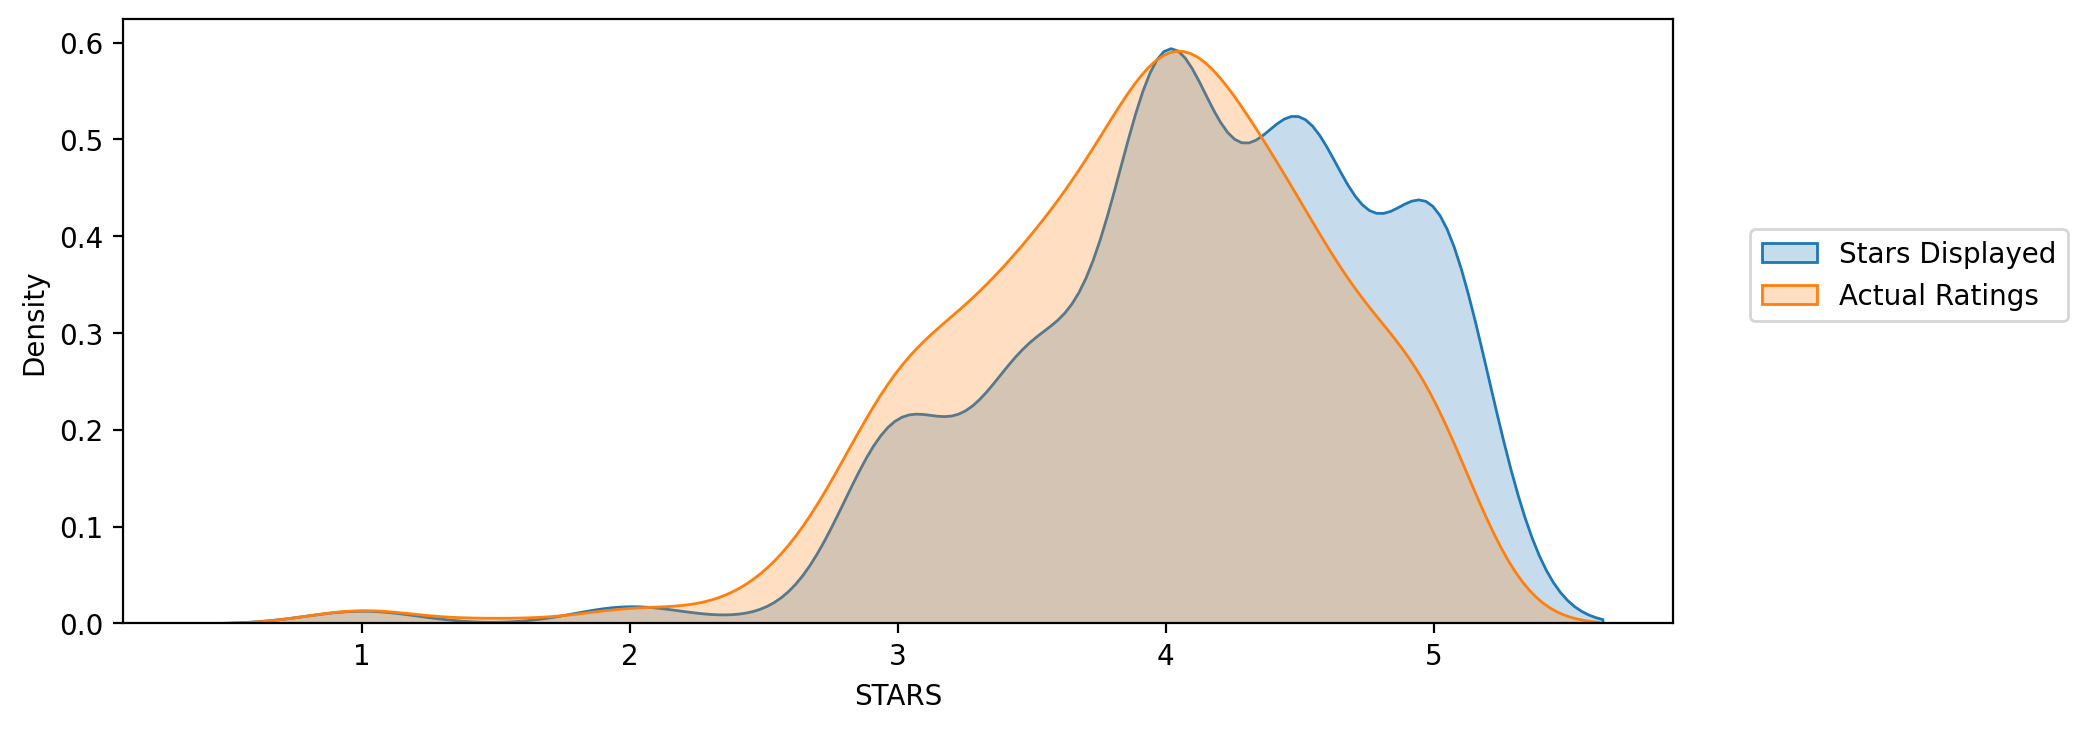

In [19]:
#Vizualizing The differrences in the distributions

plt.figure(figsize=(10,4), dpi=(200))
sns.kdeplot(data=df_ratings, x='STARS', fill=True, label='Stars Displayed')
sns.kdeplot(data=df_ratings, x='RATING', fill=True, label='Actual Ratings')

plt.legend(loc=(1.05,0.5))

In [20]:
#Quantifying the discrepancy 

df_fan['DISCREPANCY'] = np.round(df_fan['STARS'] - df_fan['RATING'],1)
df_fan.head()

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0


<AxesSubplot:xlabel='DISCREPANCY', ylabel='count'>

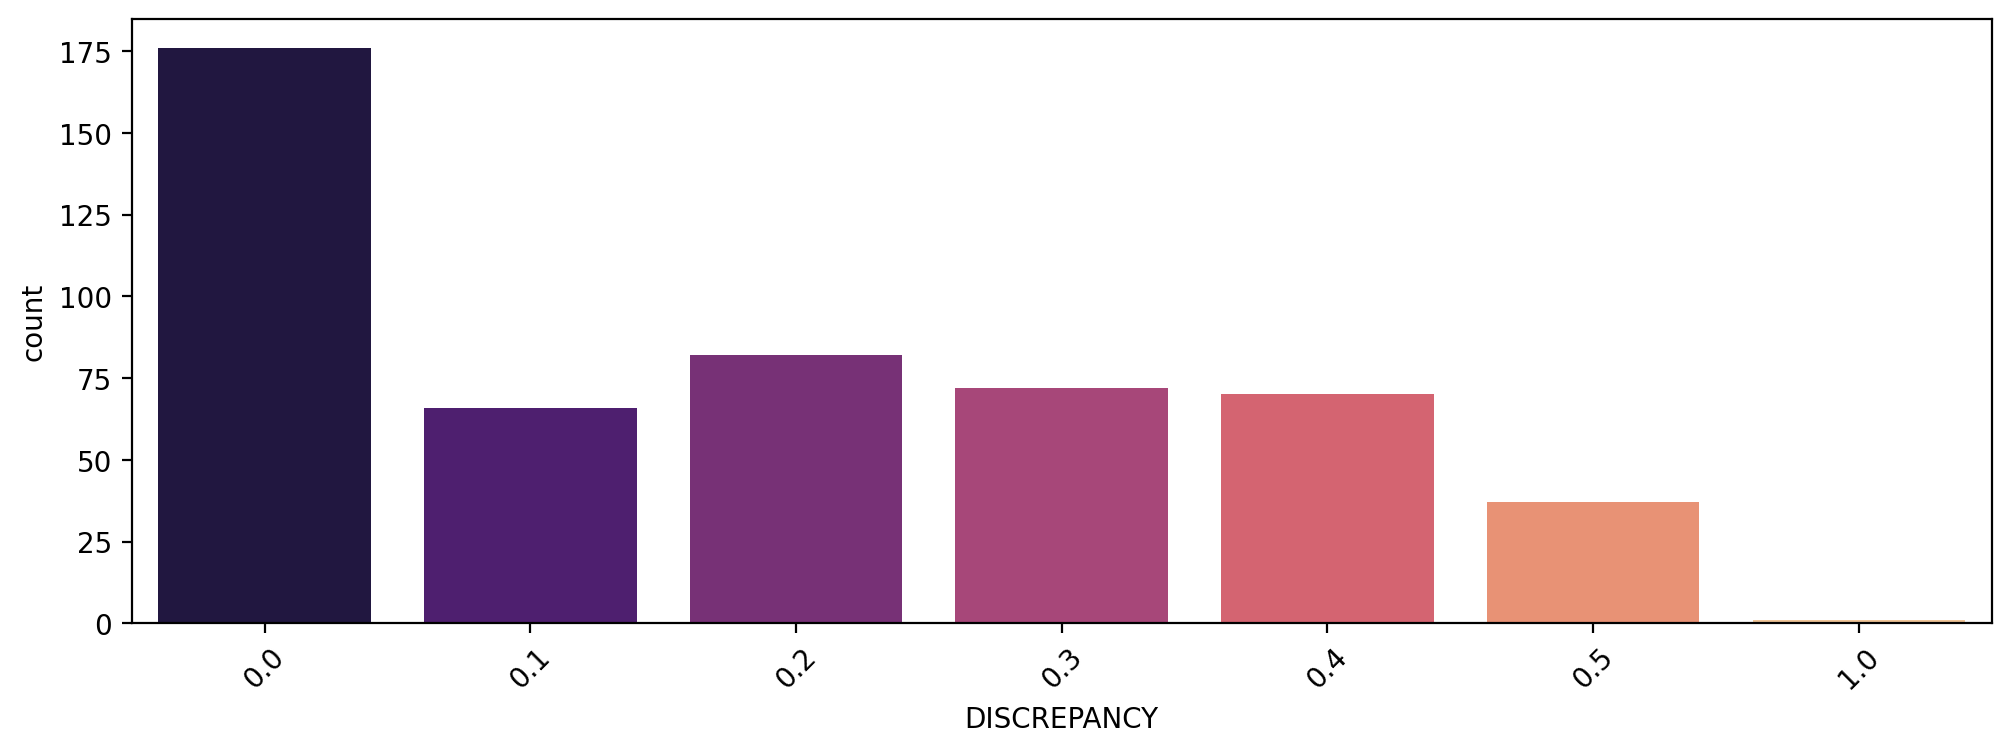

In [21]:
plt.figure(figsize=(12,4), dpi=(200))
plt.xticks(rotation=(45))
sns.countplot(data=df_fan, x='DISCREPANCY', palette='magma')


In [22]:
df_fan.iloc[df_fan['DISCREPANCY'].idxmax()]

FILM           Turbo Kid (2015)
STARS                       5.0
RATING                      4.0
VOTES                         2
YEAR                      2015)
DISCREPANCY                 1.0
Name: 381, dtype: object

In [23]:
df_fan[df_fan['DISCREPANCY'] == 1]
#fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


### Comparison of Fandango Ratings to Other Sites

In [24]:
df_rest = pd.read_csv("all_sites_scores.csv")

In [25]:
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [26]:
df_rest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


### Rotten Tomatoes

In [27]:
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

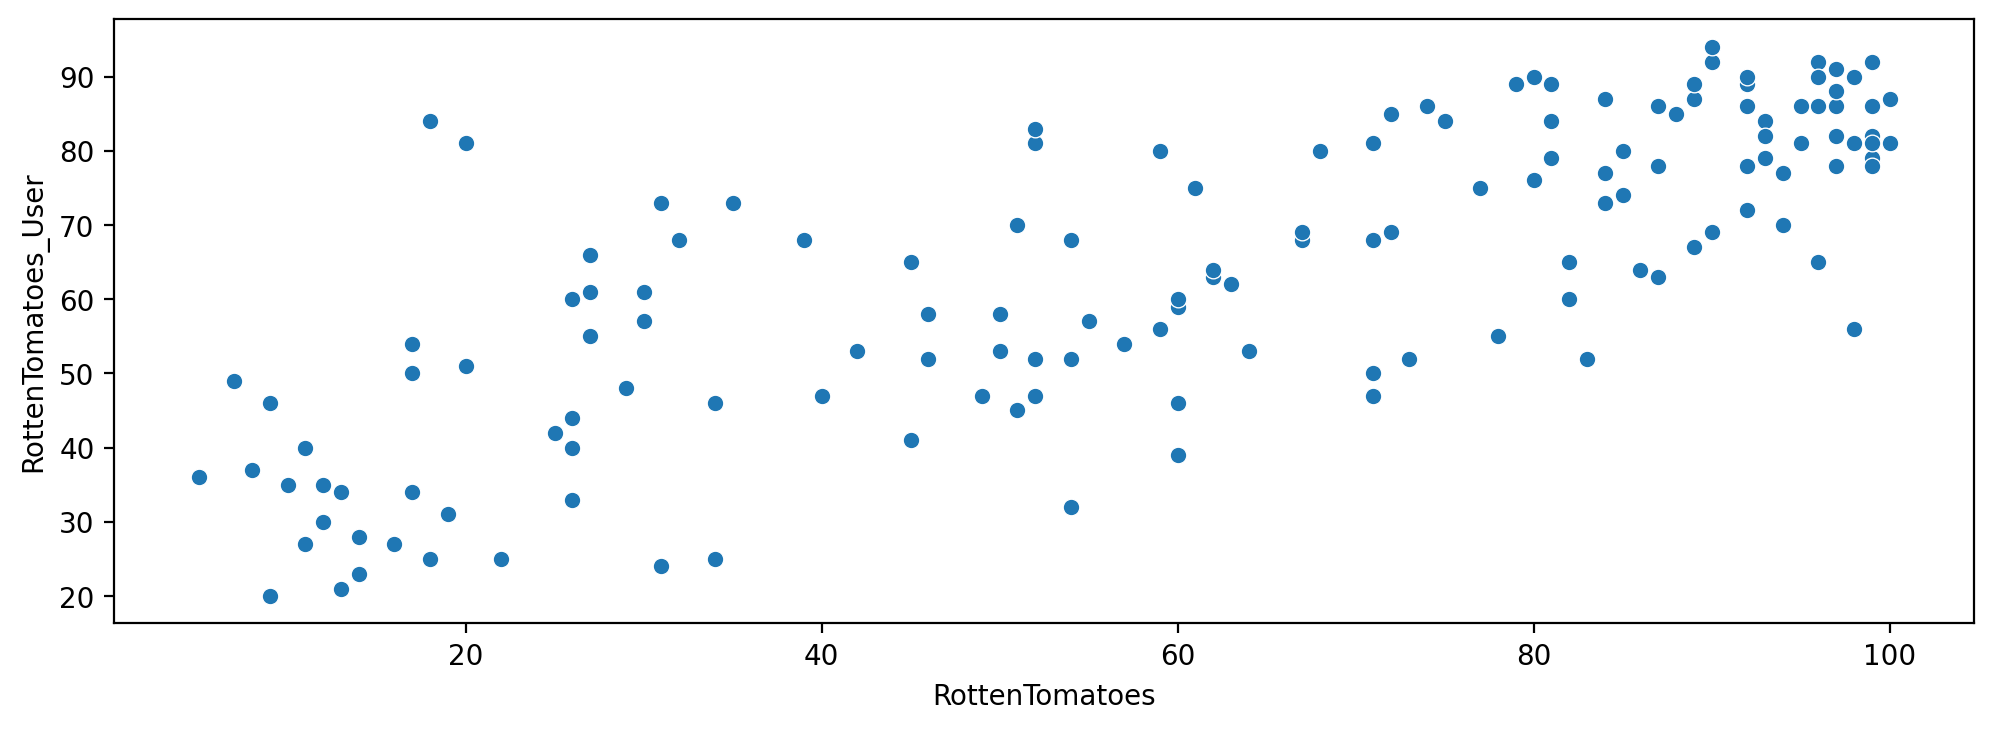

In [28]:
plt.figure(figsize=(12,4), dpi=(200))
sns.scatterplot(data=df_rest, x='RottenTomatoes', y='RottenTomatoes_User')

###  Column based off the difference between critics ratings and users ratings for Rotten Tomatoes.

In [29]:
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [30]:
df_rest['RT_Discrepancy'] = df_rest['RottenTomatoes'] - df_rest['RottenTomatoes_User']
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [31]:
df_rest['RT_Discrepancy'].nlargest(10)

69     42
112    31
115    31
37     24
40     24
145    24
90     23
7      22
11     22
87     22
Name: RT_Discrepancy, dtype: int64

In [32]:
df_rest.iloc[69]

FILM                          Mr. Turner (2014)
RottenTomatoes                               98
RottenTomatoes_User                          56
Metacritic                                   94
Metacritic_User                             6.6
IMDB                                        6.9
Metacritic_user_vote_count                   98
IMDB_user_vote_count                      13296
RT_Discrepancy                               42
Name: 69, dtype: object

In [33]:
df_rest['RT_Discrepancy'].nsmallest(10)

3     -66
85    -61
105   -42
134   -42
125   -39
132   -38
15    -37
19    -37
51    -36
47    -34
Name: RT_Discrepancy, dtype: int64

In [34]:
df_rest.iloc[3]

FILM                          Do You Believe? (2015)
RottenTomatoes                                    18
RottenTomatoes_User                               84
Metacritic                                        22
Metacritic_User                                  4.7
IMDB                                             5.4
Metacritic_user_vote_count                        31
IMDB_user_vote_count                            3136
RT_Discrepancy                                   -66
Name: 3, dtype: object

### The Mean Absolute Difference between RT scores and RT User scores as described above.

In [35]:
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [36]:
df_rest['RT_Discrepancy_Absolute'] = df_rest['RT_Discrepancy']**2
df_rest['RT_Discrepancy_Absolute'] = np.sqrt(df_rest['RT_Discrepancy_Absolute'])
df_rest['RT_Discrepancy_Absolute']

0      12.0
1       5.0
2      10.0
3      66.0
4      14.0
       ... 
141     9.0
142    15.0
143    19.0
144    19.0
145    24.0
Name: RT_Discrepancy_Absolute, Length: 146, dtype: float64

In [37]:
df_rest['RT_Discrepancy_Absolute'].mean()

15.095890410958905

### The distribution of the differences between RT Critics Score and RT User Score.

<Figure size 3300x1050 with 0 Axes>

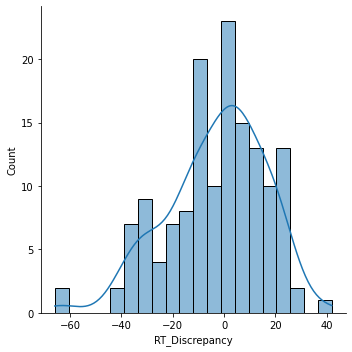

In [38]:
plt.figure(figsize=(22,7), dpi=(150))
sns.displot(data=df_rest, x='RT_Discrepancy', kde=True, bins=20)

### Distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

In [39]:
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12.0
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66.0
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14.0


<Figure size 2400x800 with 0 Axes>

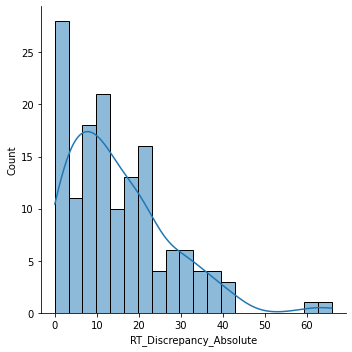

In [40]:
plt.figure(figsize=(12,4), dpi=(200))
sns.displot(data=df_rest, x='RT_Discrepancy_Absolute', kde=True, bins=20)

### The top 5 movies users rated higher than critics on average

In [41]:
df_rest.nsmallest(5, 'RT_Discrepancy')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66.0
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61,61.0
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42,42.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42,42.0
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39,39.0


### The top 5 movies critics scores higher than users on average.

In [42]:
df_rest.nlargest(5, 'RT_Discrepancy')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42,42.0
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31,31.0
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31,31.0
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24,24.0
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24,24.0


### Scatterplot of the Metacritic Rating versus the Metacritic User rating.

<AxesSubplot:xlabel='Metacritic', ylabel='Metacritic_User'>

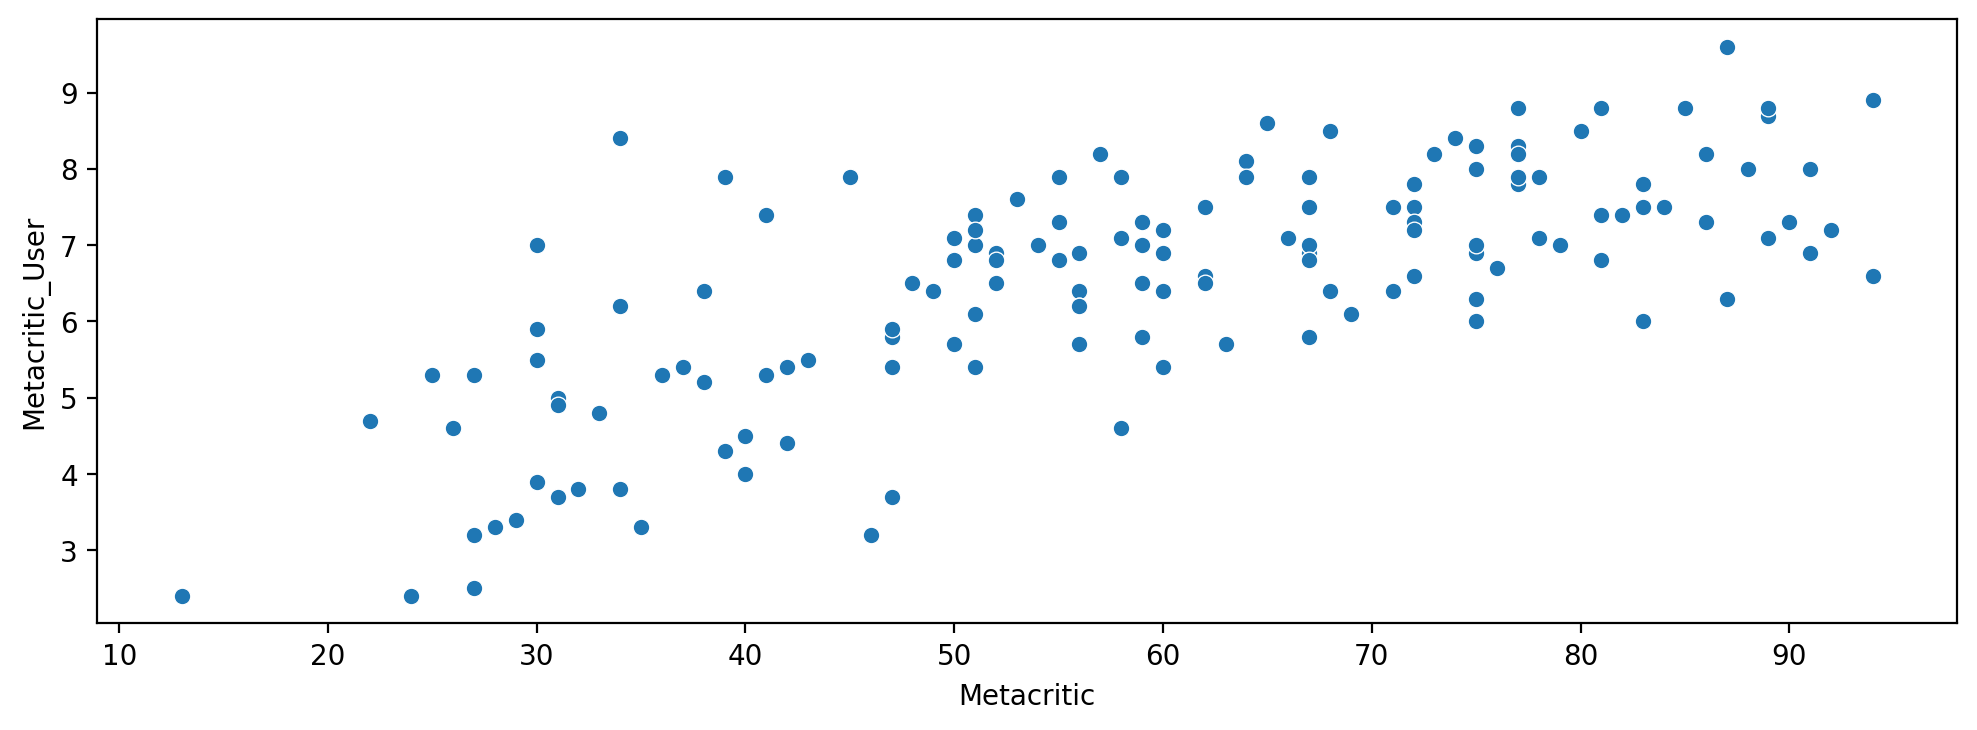

In [43]:
plt.figure(figsize=(12,4), dpi=(200))
sns.scatterplot(data=df_rest, x='Metacritic', y='Metacritic_User')

### Analysis of the most popular movies.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

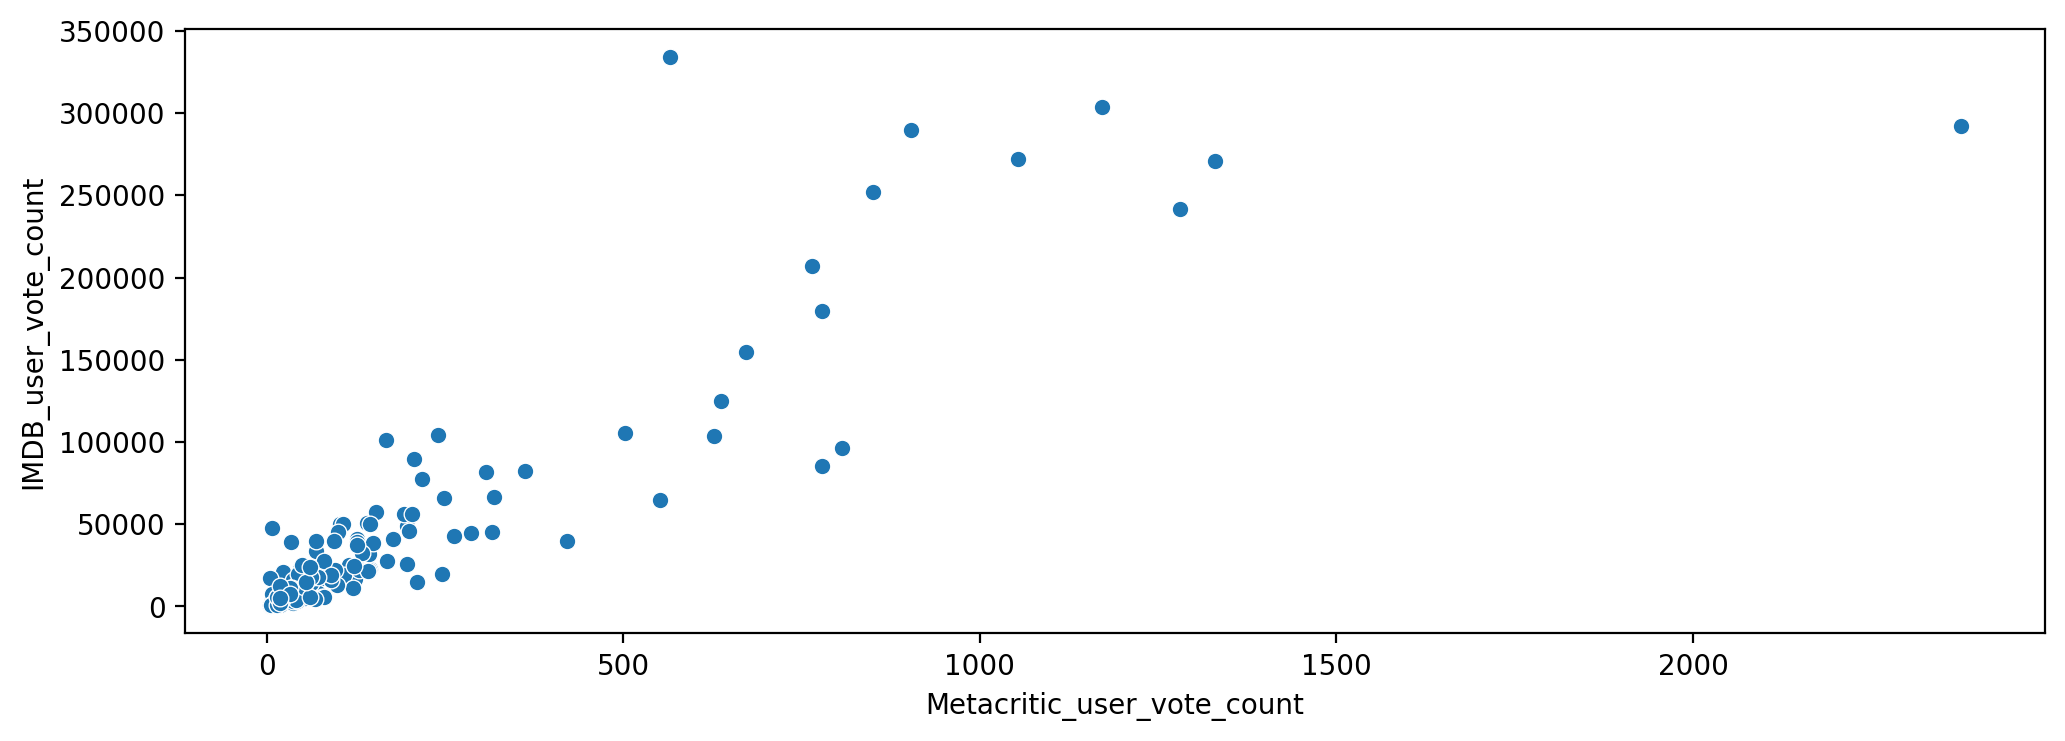

In [44]:
### a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

plt.figure(figsize=(12,4), dpi=(200))
sns.scatterplot(data=df_rest, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [45]:
# The movie with the highest IMDB user vote count?
df_rest.iloc[df_rest['IMDB_user_vote_count'].idxmax()]

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
RT_Discrepancy                                       -2
RT_Discrepancy_Absolute                             2.0
Name: 14, dtype: object

In [46]:
df_rest.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2.0


In [47]:
### The movie with the highest Metacritic User Vote count?
df_rest.iloc[df_rest['Metacritic_user_vote_count'].idxmax()]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
RT_Discrepancy                                        9
RT_Discrepancy_Absolute                             9.0
Name: 88, dtype: object

In [48]:
df_rest.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9.0


### Fandago Scores vs. All Sites

##### Combining the Fandango Table with the All Sites table.

In [49]:
df_rest.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12.0
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5.0
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66.0
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14.0


In [50]:
df_fan.head()

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0


In [51]:
#pd.merge(registrations,logins,how='inner',on='name')
df_full_set = pd.merge(df_fan,df_rest,how='inner',on='FILM')

In [52]:
df_full_set.head()

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17,17.0
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10,10.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13,13.0
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3,3.0
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8,8.0


### Normalize columns to Fandango STARS and RATINGS 0-5

In [53]:
# CODE HERE
df_full_set.head()

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17,17.0
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10,10.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13,13.0
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3,3.0
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8,8.0


In [54]:
# Dont run this cell multiple times, otherwise you keep dividing!
df_full_set['RT_Norm'] = np.round(df_full_set['RottenTomatoes']/20,1)
df_full_set['RTU_Norm'] =  np.round(df_full_set['RottenTomatoes_User']/20,1)

In [55]:
# Dont run this cell multiple times, otherwise you keep dividing!
df_full_set['Meta_Norm'] =  np.round(df_full_set['Metacritic']/20,1)
df_full_set['Meta_U_Norm'] =  np.round(df_full_set['Metacritic_User']/2,1)

In [56]:
# Dont run this cell multiple times, otherwise you keep dividing!
df_full_set['IMDB_Norm'] = np.round(df_full_set['IMDB']/2,1)

In [57]:
df_full_set.head()

,FILM,STARS,RATING,VOTES,YEAR,DISCREPANCY,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17,17.0,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10,10.0,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13,13.0,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3,3.0,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8,8.0,4.9,4.5,4.7,4.4,4.3


In [58]:
df_norm = df_full_set[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]
df_norm.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

<AxesSubplot:ylabel='Density'>

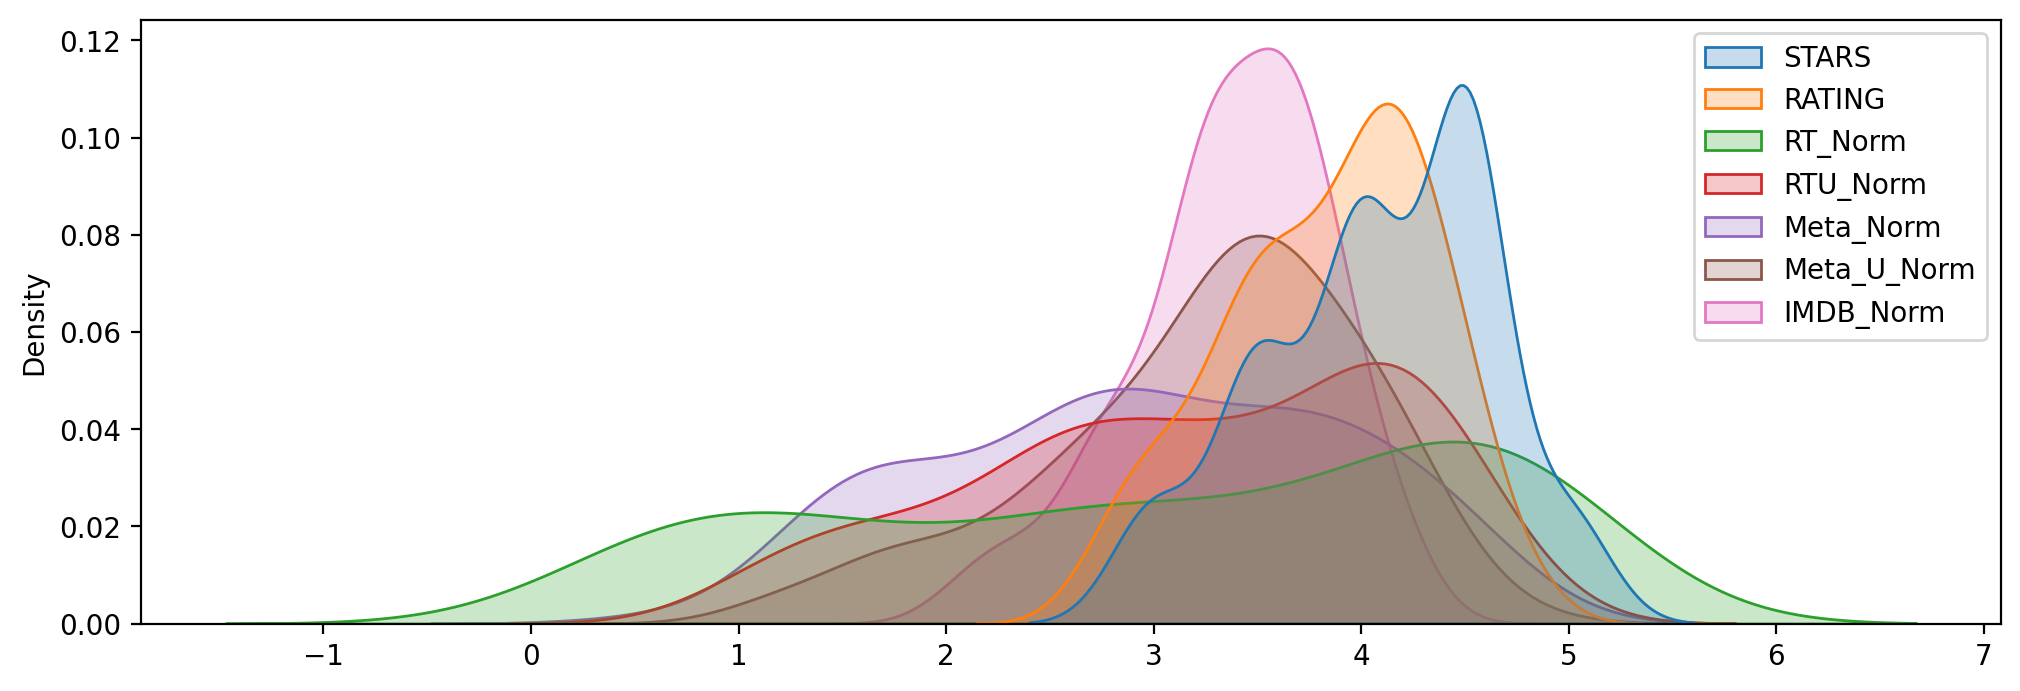

In [59]:
plt.figure(figsize=(12,4), dpi=(200))
sns.kdeplot(data=df_norm, fill=True)

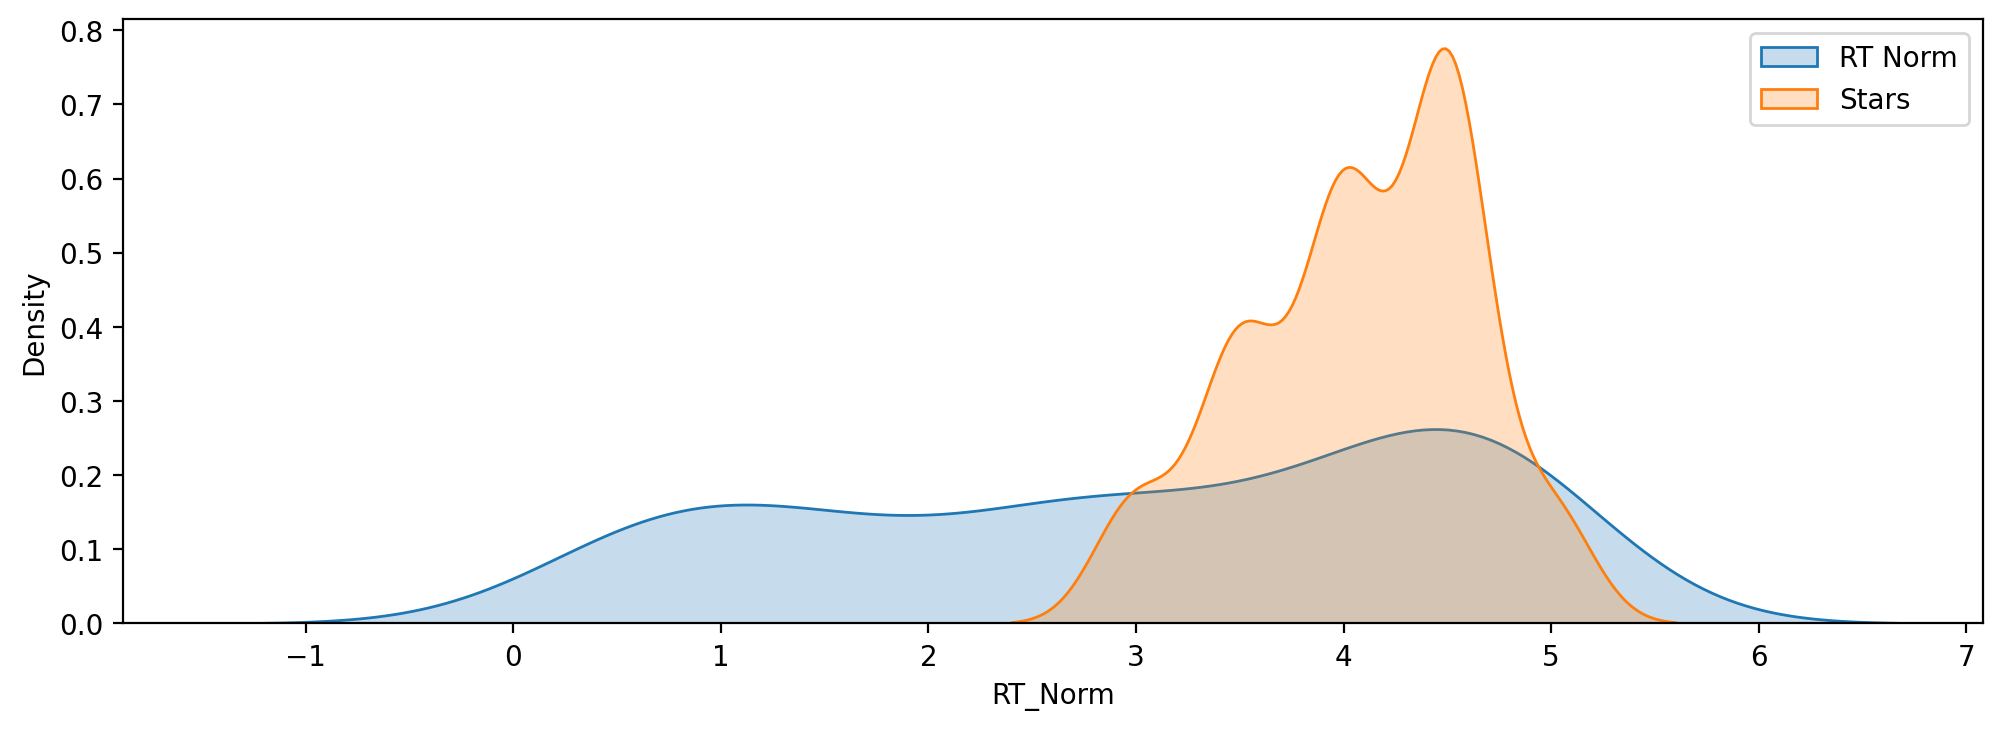

In [60]:
plt.figure(figsize=(12,4), dpi=(200))
sns.kdeplot(data=df_norm, x='RT_Norm', fill=True, label='RT Norm')
sns.kdeplot(data=df_norm, x='STARS', fill=True, label='Stars')
plt.legend()

<Figure size 2400x800 with 0 Axes>

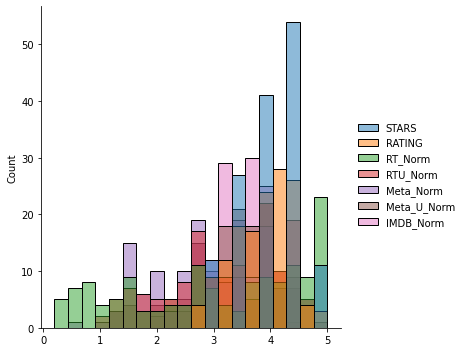

In [61]:
plt.figure(figsize=(12,4), dpi=(200))
sns.displot(data=df_norm, bins=20)

### How the worst movies are rated across all platforms

In [62]:
df_cmap= df_full_set.drop('FILM', axis=1)
df_cmap

,STARS,RATING,VOTES,YEAR,DISCREPANCY,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,34846,2015),0.1,25,42,46,3.2,4.2,778,179506,-17,17.0,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,34390,2015),0.0,71,81,59,7.0,7.3,1281,241807,-10,10.0,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,34085,2015),0.2,72,85,72,6.6,7.4,850,251856,-13,13.0,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,33538,2015),0.2,81,84,67,6.8,7.4,764,207211,-3,3.0,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,15749,2015),0.0,98,90,94,8.9,8.6,807,96252,8,8.0,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3.5,3.5,41,2015),0.0,87,63,68,6.4,6.7,19,5289,24,24.0,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,38,2015),0.4,95,81,87,6.3,7.0,18,1107,14,14.0,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,38,2015),0.3,93,84,67,7.0,7.8,4,732,9,9.0,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,36,2015),0.1,95,86,86,7.3,7.4,14,696,9,9.0,4.8,4.3,4.3,3.6,3.7


In [63]:
df_cmap.corr()

,STARS,RATING,VOTES,DISCREPANCY,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,RT_Discrepancy,RT_Discrepancy_Absolute,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
STARS,1.000000,0.959869,0.354278,0.385643,0.290192,0.702360,0.177523,0.334107,0.585114,0.229157,0.303819,-0.274577,-0.041685,0.291971,0.701676,0.176795,0.336772,0.584997
RATING,0.959869,1.000000,0.404947,0.111411,0.284391,0.721649,0.171986,0.331946,0.596930,0.245724,0.314966,-0.303729,-0.039064,0.285493,0.720463,0.171162,0.334292,0.597192
VOTES,0.354278,0.404947,1.000000,-0.076845,-0.004994,0.143032,-0.005232,-0.071345,0.042366,0.651962,0.695113,-0.156498,-0.066789,-0.006858,0.140994,-0.003068,-0.071947,0.040855
DISCREPANCY,0.385643,0.111411,-0.076845,1.000000,0.092682,0.114670,0.063239,0.091844,0.109519,0.003613,0.040379,0.026271,-0.019194,0.095361,0.116150,0.063370,0.093570,0.108242
RottenTomatoes,0.290192,0.284391,-0.004994,0.092682,1.000000,0.779580,0.957243,0.752564,0.777921,0.107848,0.103365,0.759122,-0.363953,0.999734,0.781293,0.956719,0.752456,0.773080
RottenTomatoes_User,0.702360,0.721649,0.143032,0.114670,0.779580,1.000000,0.689206,0.684583,0.894356,0.194638,0.217989,0.184106,-0.105672,0.779840,0.999418,0.687337,0.688904,0.891279
Metacritic,0.177523,0.171986,-0.005232,0.063239,0.957243,0.689206,1.000000,0.721946,0.725744,0.135446,0.111512,0.785950,-0.352823,0.956715,0.690196,0.999333,0.720179,0.721257
Metacritic_User,0.334107,0.331946,-0.071345,0.091844,0.752564,0.684583,0.721946,1.000000,0.754456,0.118209,0.109063,0.469537,-0.313760,0.750944,0.686739,0.716623,0.999028,0.745799
IMDB,0.585114,0.596930,0.042366,0.109519,0.777921,0.894356,0.725744,0.754456,1.000000,0.202368,0.226762,0.291304,-0.225146,0.778389,0.893619,0.723965,0.756147,0.997399
Metacritic_user_vote_count,0.229157,0.245724,0.651962,0.003613,0.107848,0.194638,0.135446,0.118209,0.202368,1.000000,0.880366,-0.033042,-0.044192,0.105003,0.194244,0.132651,0.121597,0.203534


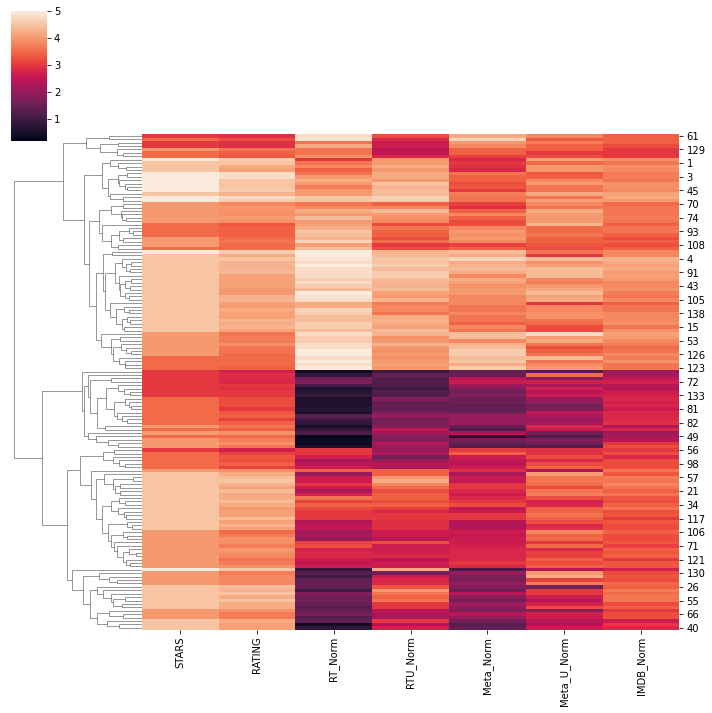

In [64]:
sns.clustermap(data=df_norm, col_cluster=False)

##### Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.

In [65]:
df_norm.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [66]:
df_title_norm = df_full_set[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]
df_title_norm

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)
...,...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4,"Kumiko, The Treasure Hunter (2015)"
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5,The Diary of a Teenage Girl (2015)
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9,The Wrecking Crew (2015)
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7,Tangerine (2015)


In [67]:
df_title_norm.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


In [68]:
df_worst_movies = df_title_norm.nsmallest(10,'RT_Norm')
df_worst_movies.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)


<AxesSubplot:ylabel='Density'>

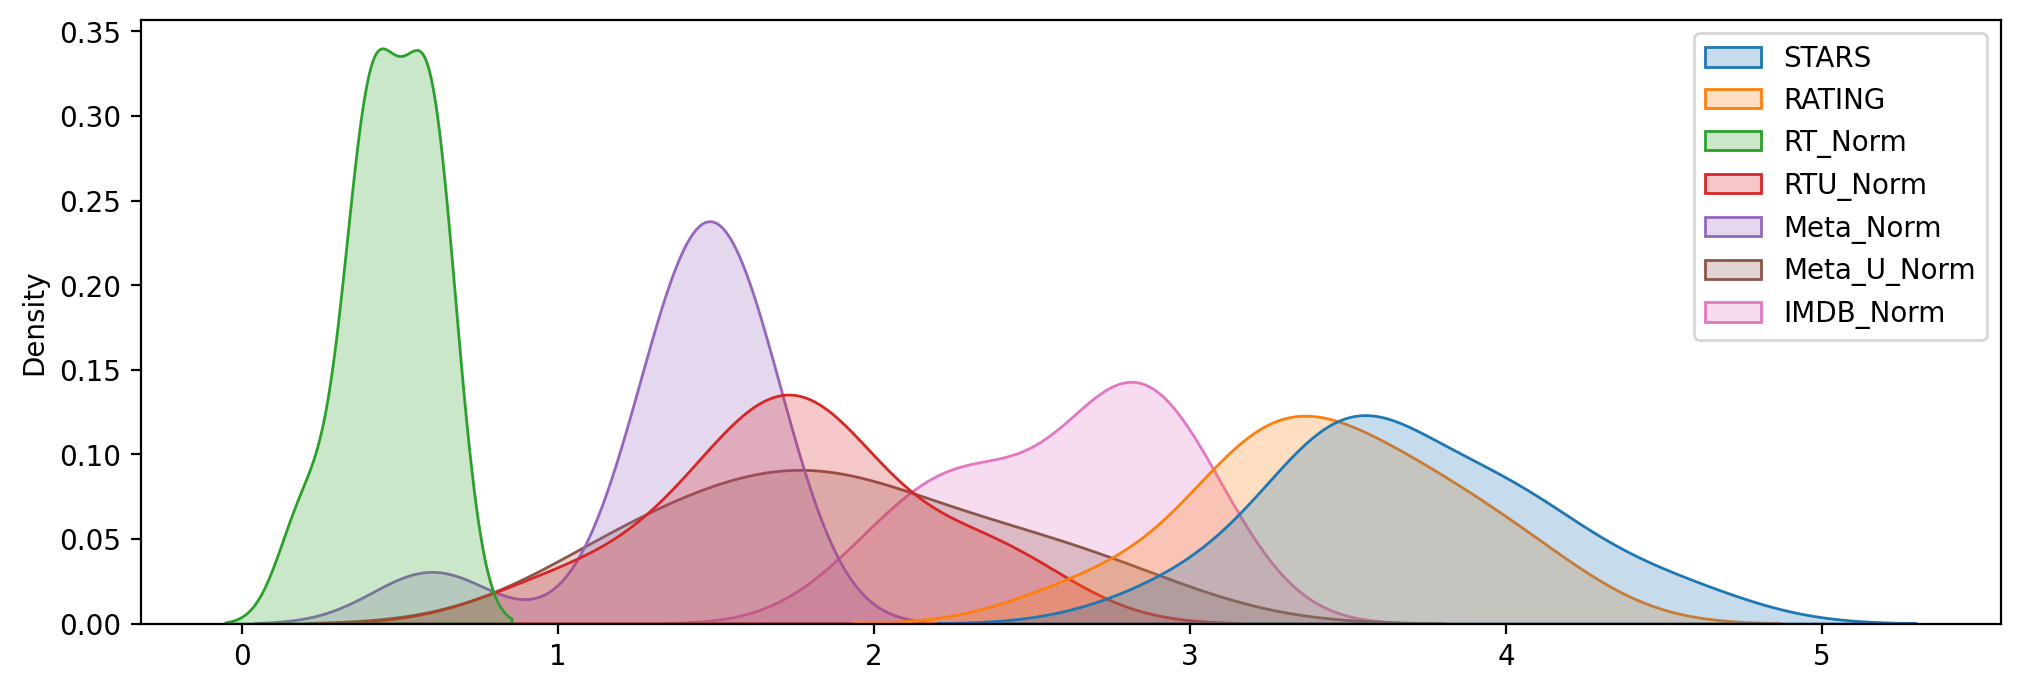

In [69]:
plt.figure(figsize=(12,4), dpi=(200))
sns.kdeplot(data=df_worst_movies, fill=True)

### Conclusion. Fandango is clearly showing around 3-4 star ratings for films that are clearly bad. There is a clear bias the site has when is comes to rating movies.